In [1]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [5]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data-1.csv'
ap_data = pd.read_csv(file_path)

In [6]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 9
Number of rows: 12036


In [7]:
#check the statistics of the data per columns
ap_data.describe()

,channel,signal_strength,floorid,latitude,longitude
count,12036.000000,12036.000000,12036.000000,12036.000000,12036.000000
mean,2433.777584,-70.246760,136.857345,7.065779,125.596436
std,17.210768,11.846509,39.630931,0.000040,0.000034
min,2412.000000,-104.000000,1.000000,7.065631,125.596350
25%,2417.000000,-79.000000,118.000000,7.065761,125.596408
50%,2437.000000,-70.000000,142.000000,7.065785,125.596435
75%,2447.000000,-61.000000,165.000000,7.065805,125.596465
max,2462.000000,-8.000000,189.000000,7.065841,125.596502


In [8]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'latitude', 'longitude', 'timestamp'], dtype=object)

In [9]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [10]:
#Assess unique values per columns
unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()

print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))


Unique Mac Address : ['6A:BD:12:5B:D6:64' 'F6:CE:87:F2:06:21' 'A2:89:5E:B6:E7:58'
 '02:9D:2F:8D:49:90' 'FE:47:AD:D7:13:E2' '56:3A:A2:F8:0C:63'
 '7A:6B:C2:5A:7B:88' '52:39:94:90:76:D2' '1E:03:B6:E0:9E:3C'
 '56:DE:9D:83:4D:C6' 'B6:6A:AD:C1:CF:19' 'E6:4C:39:FC:36:8B'
 'BE:7E:CC:35:1C:46' '7A:44:1F:B5:90:E3' '22:95:8E:C1:1D:93'
 '8E:B0:7A:54:55:A6']
Unique SSID : ['C11' 'C5' 'C7' 'C6' 'C1' 'C3' 'C8' 'C10' 'C2' 'C9' 'C4']
Unique Channel : [2462 2457 2452 2422 2412 2417 2437 2432 2447 2442 2427]
Unique Floor ID : [121 101 102 103 104 105 106 107 108 109 110 111 112 117 118 119 120 127
 128 129 130 137 138 139 140 147 148 149 150 157 158 159 160 167 168 169
 170 122 123 124 125 126 131 132 133 134 135 136 141 142 143 144 145 146
 151 152 153 154 155 156 161 162 163 164 165 166 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189   1   2   3   4   5
   6   7   8   9  10  11  12  13  14  15  16  17  18 113 114 115 116]


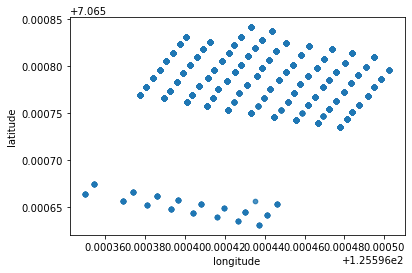

In [11]:
#Map the data i.e. see the campus
ap_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('data_map.png')

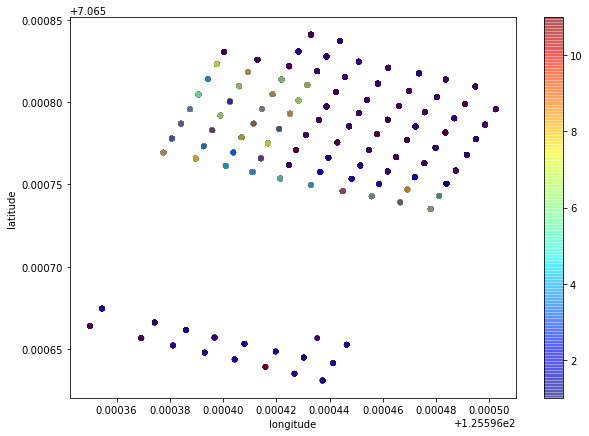

In [12]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users

# Assuming ap_data is your DataFrame
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['source'] = ap_data['source'].str.replace('cap', '')

# Convert the 'source_without_C' column to numeric
ap_data['source'] = pd.to_numeric(ap_data['source'], errors='coerce')

# Plot the scatter plot using the modified 'source' values
ap_data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    figsize=(10, 7),
    c=ap_data['ssid'],  # Use the modified 'source' values
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False
)

plt.savefig('user_map2.png')

<AxesSubplot:>

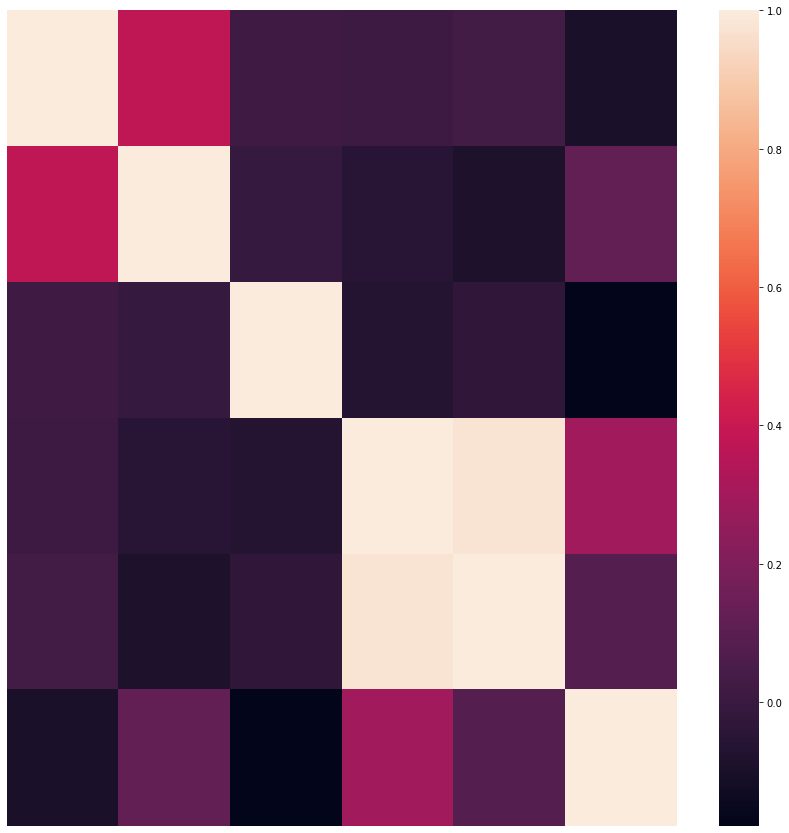

In [10]:
# plot the correlations between the WAP features
corr_matrix = ap_data.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

In [14]:
print(ap_data)

             mac_address  ssid  channel  source  signal_strength  floorid  \
0      6A:BD:12:5B:D6:64    11     2462       1              -61      121   
1      6A:BD:12:5B:D6:64    11     2462       1              -52      121   
2      6A:BD:12:5B:D6:64    11     2462       1              -53      121   
3      6A:BD:12:5B:D6:64    11     2457       1              -51      121   
4      6A:BD:12:5B:D6:64    11     2462       1              -52      121   
...                  ...   ...      ...     ...              ...      ...   
12031  FE:47:AD:D7:13:E2     1     2447       2              -68      116   
12032  8E:B0:7A:54:55:A6    11     2457       2              -71      116   
12033  22:95:8E:C1:1D:93     2     2462       2              -72      116   
12034  FE:47:AD:D7:13:E2     1     2452       1              -71      116   
12035  8E:B0:7A:54:55:A6    11     2457       1              -66      116   

       latitude   longitude         timestamp  
0      7.065750  125.596484

In [16]:
# Save the combined data to a CSV file
output_file = 'ap_data_processed_raw_data.csv'
ap_data.to_csv(output_file, index=False)

In [ ]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [2]:
# Load the dataset
file_path = r'C:\Users\pc\Desktop\Thesis\Untitled Folder 1\ap_data_processed_raw_data.csv'
trainingData = pd.read_csv(file_path)

print(trainingData)

             mac_address  ssid  channel  source  signal_strength  floorid  \
0      6A:BD:12:5B:D6:64    11     2462       1              -61      121   
1      6A:BD:12:5B:D6:64    11     2462       1              -52      121   
2      6A:BD:12:5B:D6:64    11     2462       1              -53      121   
3      6A:BD:12:5B:D6:64    11     2457       1              -51      121   
4      6A:BD:12:5B:D6:64    11     2462       1              -52      121   
...                  ...   ...      ...     ...              ...      ...   
12031  FE:47:AD:D7:13:E2     1     2447       2              -68      116   
12032  8E:B0:7A:54:55:A6    11     2457       2              -71      116   
12033  22:95:8E:C1:1D:93     2     2462       2              -72      116   
12034  FE:47:AD:D7:13:E2     1     2452       1              -71      116   
12035  8E:B0:7A:54:55:A6    11     2457       1              -66      116   

       latitude   longitude         timestamp  
0      7.065750  125.596484

In [4]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    df.iloc[:, 9:12] = np.where(df.iloc[:, 9:12] <= 0, 
                df.iloc[:, 9:12] + 105, 
                df.iloc[:, 4] - 100)
    
    # remove selected columns... 
    columns_removed = ['mac_address','timestamp']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
    print(df)
   
    # Return the cleaned dataframe.
    return df 

In [5]:
#Apply Cleaning

trainingData  = clean_data(trainingData)

       ssid  channel  source  signal_strength  floorid  latitude   longitude
0        11     2462       1               44      121  7.065750  125.596484
1        11     2462       1               53      121  7.065750  125.596484
2        11     2462       1               52      121  7.065750  125.596484
3        11     2457       1               54      121  7.065750  125.596484
4        11     2462       1               53      121  7.065750  125.596484
...     ...      ...     ...              ...      ...       ...         ...
12031     1     2447       2               37      116  7.065762  125.596425
12032    11     2457       2               34      116  7.065762  125.596425
12033     2     2462       2               33      116  7.065762  125.596425
12034     1     2452       1               34      116  7.065762  125.596425
12035    11     2457       1               39      116  7.065762  125.596425

[12036 rows x 7 columns]


In [6]:
def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    
    global X
    global y
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['longitude','latitude','floorid'], axis=1)
    y = df[['floorid']]
    
    
    #create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid'])
    
    
    return X, y

In [7]:
#Apply preprocessing

X, y = preprocess_data(trainingData)

In [8]:
def split_data(preprocess_data):
    """
    TO AVOID OVERFITTING: Split the training data into training and testing sets 
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [9]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)

Training set has 9628 samples.
Testing set has 2408 samples.


In [10]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 4.
Total Variance Explained by PCA Components = 1.0.


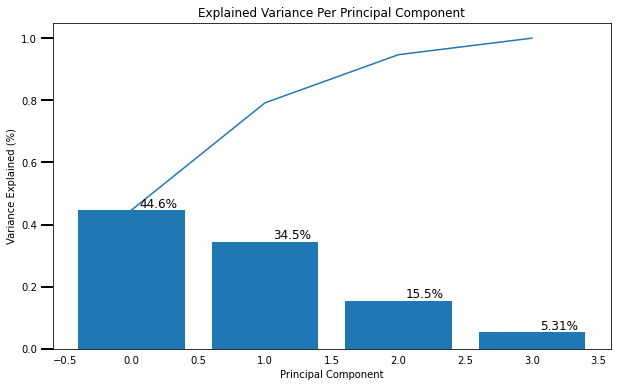

In [12]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

pca_plot(pca)

In [13]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [ ]:
#MODEL Model Applications////////////////////////////////////////////////////////////////////////////////////////////////////////

In [30]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.0029069767441860465
--- Run time: 0.01 mins ---


In [31]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.0012458471760797341
--- Run time: 0.05 mins ---


In [32]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.04152823920265781
--- Run time: 0.01 mins ---


In [33]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Accuracy =  0.02823920265780731
--- Run time: 1.22 mins ---


In [44]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,50), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=11 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=13 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=15 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=17 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=19 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=21 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=23 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=26 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=28 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=28 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=29 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=30 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=32 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=34 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=36 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=38 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=40 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=42 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=44 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=46 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=48 as keyword args. From version 0.25 passing these as positional arguments will result in an erro

{'k': 1, 's': 0.5} 0.025862307993149113
--- Run time: 775.16 mins ---


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 7.89%


In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

NameError: name 'train_test_split' is not defined

In [ ]:
# Assuming 'ap_data_processed' is your training data DataFrame
# Replace these column names with the actual column names in your dataset
features = ['ssid','cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength',
            'cap1_channel', 'cap2_channel', 'cap3_channel']
target = 'floorid'

# Select features (X) and target variable (y)
X = ap_data_processed[features]
y = ap_data_processed[target]



In [ ]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [ ]:
# Assuming 'combined_scanned_data' is your scanned data DataFrame

# Assuming 'ap_data_processed' is your training data DataFrame
# Replace these column names with the actual column names in your dataset
features = ['ssid','cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength',
            'cap1_channel', 'cap2_channel', 'cap3_channel']
target = 'floorid'

# Select features (X) and target variable (y)
X = ap_data_processed[features]
y = ap_data_processed[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

# Train a k-Nearest Neighbors classifier with Euclidean metric
k = 1 # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'combined_scanned_data' is your scanned data DataFrame
# Replace these column names with the actual column names in your dataset
scanned_data_features = combined_scanned_data[features]

# Make predictions on the scanned data
predictions = knn.predict(scanned_data_features)

# Add predicted floorid to the scanned data
combined_scanned_data['predicted_floorid'] = predictions

# Display the predicted floorid for the scanned data
print(combined_scanned_data[['mac_address', 'ssid', 'predicted_floorid']])

In [ ]:
# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

start_time = time.time()

parameters = {'n_neighbors': range(1, 500), 'p': [2], 'metric': ['euclidean']}
score = 'accuracy'

knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring=score, cv=3)
knn.fit(X_train, y_train)

print(knn.best_params_, knn.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time) / 60), 2))


In [ ]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

In [ ]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [ ]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()



print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train_lil:", y_train_lil.shape)


In [ ]:
print("Shape of X_train_pca:", X_train_pca.shape)


In [ ]:
# Check column names
print(X_train_pca.columns)

In [ ]:
# Access a specific column by index
print(X_train_pca.iloc[:, 148])

In [ ]:
print("Shape of y_train:", y_train.shape)

In [ ]:
import numpy as np

# Check the shape of X_train_pca
print("Shape of X_train_pca:", X_train_pca.shape)

# Access a specific column by index (for example, column at index 148)
column_2 = X_train_pca[:, 2]
print("Column at index 2:", column_2)

# If you want to check all column values, you can loop through columns
for i in range(X_train_pca.shape[1]):
    print(f"Column {i}:", X_train_pca[:, i])

In [ ]:
print("Column indices:", range(X_train_pca.shape[1]))


In [ ]:
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train_lil:", y_train_lil.shape)


In [ ]:
start_time = time.time()

from skmultilearn.adapt import MLkNN
from scipy.sparse import lil_matrix

# Convert y_train to sparse format
y_train_lil = lil_matrix(y_train.T)  # Transpose y_train if necessary

# Create and fit the MLkNN model
MLKNN_1_classifier = MLkNN(k=1)
MLKNN_1_classifier.fit(X_train_pca, y_train_lil)

# Run predictions
predictions = MLKNN_1_classifier.predict(X_test_pca)

# Accuracy
print("Accuracy =", accuracy_score(y_test, predictions))



print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

In [ ]:
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)


In [ ]:
y_train = y_train.T  # Transpose y_train


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier with scaled data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy with scaled features: {accuracy_scaled * 100:.2f}%')


In [ ]:
#Extract data to the database
import sqlite3
import pandas as pd

# Connect to your SQLite database (replace 'your_database.db' with the actual database file)
conn = sqlite3.connect('rfid_ips.db')

# Replace 'your_query' with the SQL query to select the data you want
your_query = "SELECT * FROM ap_data_position"

# Use pandas to read the query result into a DataFrame
df = pd.read_sql_query(your_query, conn)

# Replace 'output_file.csv' with the desired file name
output_file = 'ap_data_position.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file, index=False)

print(f"Data extracted and saved to {output_file}")

# Select relevant columns
selected_columns = ['source', 'channel', 'signal_strength', 'mac_address', 'ssid', 'timestamp']
ap_data_selected = ap_data_position[selected_columns]

# Pivot the DataFrame to create separate columns for each 'cap'
ap_data_pivot = ap_data_selected.pivot_table(
    index=['mac_address', 'ssid', 'timestamp'],
    columns='source',
    values=['channel', 'signal_strength'],
    aggfunc='first'
).reset_index()

# Flatten the MultiIndex columns
ap_data_pivot.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in ap_data_pivot.columns]

# Rename columns for clarity
ap_data_pivot.columns = [
    'mac_address', 'ssid', 'timestamp',
    'cap1_channel', 'cap2_channel', 'cap3_channel',
    'cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength'
]

# Replace missing signal_strength values with 100
ap_data_pivot['cap1_signal_strength'].fillna(100, inplace=True)
ap_data_pivot['cap2_signal_strength'].fillna(100, inplace=True)
ap_data_pivot['cap3_signal_strength'].fillna(100, inplace=True)

# Replace missing channel values with 0
ap_data_pivot['cap1_channel'].fillna(0, inplace=True)
ap_data_pivot['cap2_channel'].fillna(0, inplace=True)
ap_data_pivot['cap3_channel'].fillna(0, inplace=True)

# Save the DataFrame to a CSV file
ap_data_pivot.to_csv('ap_data_position_processed.csv', index=False)

# Print the resulting DataFrame
print(ap_data_pivot.head())

#If CAP1, CAP2, and CAP3 are available
# Check if the CSV file exists
if os.path.exists(csv_file):
    # Read the CSV file into a DataFrame
    ap_data_pivot = pd.read_csv(csv_file)

    # Check if 'cap1', 'cap2', and 'cap3' are available in the 'source' column
    if all(cap in ap_data_pivot['source'].unique() for cap in ['cap1', 'cap2', 'cap3']):
        # Select relevant columns for training the KNN algorithm
        features = ['cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength',
                    'cap1_channel', 'cap2_channel', 'cap3_channel']
        target = 'floorid'  # Replace with the actual target variable

        # Assuming 'ap_data_pivot' is your DataFrame
        X = ap_data_pivot[features]
        y = ap_data_pivot[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a k-Nearest Neighbors classifier
        k = 23  # You can adjust the value of k
        knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        print(f'Accuracy: {accuracy * 100:.2f}%')

        # Now you can proceed with further processing after the KNN algorithm

        # After processing, delete the CSV file
        os.remove(csv_file)
        print(f"CSV file '{csv_file}' deleted.")
    else:
        print("Missing 'cap1', 'cap2', or 'cap3' in the 'source' column.")
else:
    print(f"CSV file '{csv_file}' not found.")


In [ ]:
# Load scanned data
combined_scanned = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data_position_processed_before - Copy.csv'

data_cap = pd.read_csv(combined_scanned)

In [ ]:
print(data_cap)

In [ ]:
dataset = pd.read_csv('ap_data_processed.csv')

In [ ]:
num_elements = len(dataset)
k_nn = np.sqrt(num_elements)
print(k_nn)

In [ ]:
# Assuming 'ap_data_processed' is your training data DataFrame
# Replace these column names with the actual column names in your dataset
features = ['ssid','cap1_channel', 'cap2_channel', 'cap3_channel',
            'cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength']
target = 'floorid'

# Select features (X) and target variable (y)
X = ap_data_processed[features]
y = ap_data_processed[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) #42

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Train a k-Nearest Neighbors classifier with Euclidean metric
k = 23 # You can adjust the value of k, 17 = 8.18%, 45 = 8.38%, 51 = 8.59%, 67=8.79%, 23=8.79%
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'combined_scanned_data' is your scanned data DataFrame
# Replace these column names with the actual column names in your dataset
scanned_data_features = data_cap[features]

# Make predictions on the scanned data
predictions = knn.predict(scanned_data_features)

# Add predicted floorid to the scanned data
data_cap['predicted_floorid'] = predictions

# Display the predicted floorid for the scanned data
print(data_cap[['mac_address', 'ssid', 'predicted_floorid']])

In [ ]:
# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# Assuming 'ap_data_processed' is your training data DataFrame
# Replace these column names with the actual column names in your dataset
features = ['cap1_channel', 'cap2_channel', 'cap3_channel',
            'cap1_signal_strength', 'cap2_signal_strength', 'cap3_signal_strength']
target = 'floorid'

# Select features (X) and target variable (y)
X = ap_data_processed[features]
y = ap_data_processed[target]

# No need to split the data into training and testing sets for prediction

#sc_X = StandardScaler()
#X = sc_X.fit_transform(X)  # You can fit_transform the entire X as you're not splitting

# Train a k-Nearest Neighbors classifier with Euclidean metric
k = 17  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
knn.fit(X, y)

# Assuming 'data_cap' is your scanned data DataFrame
# Replace these column names with the actual column names in your dataset
scanned_data_features = data_cap[features]

# Make predictions on the scanned data
predictions = knn.predict(scanned_data_features)

# Add predicted floorid to the scanned data
data_cap['predicted_floorid'] = predictions

# Display the predicted floorid for the scanned data
print(data_cap[['mac_address', 'ssid', 'predicted_floorid']])


In [ ]:
# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\Dataset\diabetes.csv'
DATASET = pd.read_csv(file_path)

In [ ]:
# Assuming 'ap_data_processed' is your training data DataFrame
# Replace these column names with the actual column names in your dataset
features = ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
target = 'Outcome'

# Select features (X) and target variable (y)
X = DATASET[features]
y = DATASET[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_) #42

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Train a k-Nearest Neighbors classifier with Euclidean metric
k = 1 # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'combined_scanned_data' is your scanned data DataFrame
# Replace these column names with the actual column names in your dataset
scanned_data_features = DATASET[features]

# Make predictions on the scanned data
predictions = knn.predict(scanned_data_features)

# Add predicted floorid to the scanned data
DATASET['predicted'] = predictions

# Display the predicted floorid for the scanned data
print(dataset[['mac_address', 'ssid', 'DATASET']])

In [ ]:
# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')